In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
'''cf = 3.894e+8 #pb per GeV^2
Mz = 91.188 # GeV --> Z boson mass
Gz = 2.4414 # GeV  --> Gamma_Z=Z boson width
alpha= 1/132.507
Gf = 1.16639e-5 # GeV^-2
Wtheta = 0.222246 # Weinberg angle
kappa = np.sqrt(2)*Gf*(Mz**2)/(4*np.pi*alpha)

Qe = -1
Vmu= -0.5 + 2*Wtheta
Ve = -0.5 + 2*Wtheta
Amu= -0.5
Ae = -0.5

s=np.linspace(100,40000,10000)
cost=np.linspace(-1,1,10000)'''

In [3]:
'''def chi1(s):
    # s = np.array(s)
    num = kappa*s*(s-Mz**2)
    den = (s-Mz**2)**2 + (Gz**2)*(Mz**2)
    return num/den

def chi2(s):
    # s = np.array(s)
    num = (kappa**2)*(s**2)
    den = (s-Mz**2)**2 + (Gz**2)*(Mz**2)
    return num/den

def A0(s):
    # s = np.array(s)
    return Qe**2 - 2*Qe*Vmu*Ve*chi1(s) + (Amu**2 + Vmu**2)*(Ae**2 + Ve**2)*chi2(s)

def A1(s):
    # s = np.array(s)
    return - 4*Qe*Amu*Ae*chi1(s) + 8*Amu*Vmu*Ae*Ve*chi2(s)

# cross section for center of mass energy and scattering angle
def cross_section(s,cost):
    s = np.array(s)
    cost = np.array(cost)
    const = (alpha**2)/(4*s)
    return const*(A0(s)*(1+cost**2) + A1(s)*cost)'''

In [2]:
cf = 3.894e+8 #pb per GeV^-2
Mz = 91.188 # GeV --> Z boson mass
Gz = 2.4414 # GeV  --> Gamma_Z=Z boson width
alpha= 1/(132.507)
Gf = 1.16639e-5 # GeV^-2
Wtheta = 0.222246 # Weinberg angle
kappa = np.sqrt(2)*Gf*(Mz**2)/(4*np.pi*alpha)

Qe = -1
Vmu= -0.5 + 2*(Wtheta)
Ve = -0.5 + 2*(Wtheta)
Amu= -0.5
Ae = -0.5

def chi1(s):
    # s = np.array(s)
    num = kappa*s*(s-Mz**2)
    den = (s-Mz**2)**2 + (Gz**2)*(Mz**2)
    return num/den
def chi2(s):
    # s = np.array(s)
    num = (kappa**2)*(s**2)
    den = (s-Mz**2)**2 + (Gz**2)*(Mz**2)
    return num/den

def A0(s):
    # s = np.array(s)
    return Qe**2 - 2*Qe*Vmu*Ve*chi1(s) + (Amu**2 + Vmu**2)*(Ae**2 + Ve**2)*chi2(s)

def A1(s):
    # s = np.array(s)
    return - 4*Qe*Amu*Ae*chi1(s) + 8*Amu*Vmu*Ae*Ve*chi2(s)

# option to calculate the cross section using the standard model, where the Z boson is present, or with QED where there is no Z boson
def cross_section(E,cost, method='SM'):
    s = np.array(E**2)
    cost = np.array(cost)
    const = (alpha**2)/(4*s)
    if method=='SM':
        return const*(A0(s)*(1+cost**2) + A1(s)*cost)*cf # multiply by the conversion factor to convert to pb
    elif method=='QED':
        return const*(1+cost**2)*cf # multiply by the conversion factor to convert to pb

In [5]:
# prepping for contour plot
s = np.linspace(100,40000,10000)
e = np.linspace(10,200,10000)
cost = np.linspace(-1,1,10000)
#s = np.geomspace(100,40000,10000)
#e = np.geomspace(10,200,10000)
#cost = np.geomspace(-1,1,10000)  # just gives nans

#S, C = np.meshgrid(s, cost)
#CS = cross_section(S,C)#,'QED')
E, C = np.meshgrid(e, cost)
CS = cross_section(E,C,'QED')

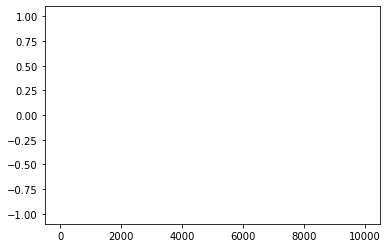

In [42]:
plt.plot(cost)

In [52]:
s = np.geomspace(100,40000,10000)
e = np.geomspace(10,200,10000)

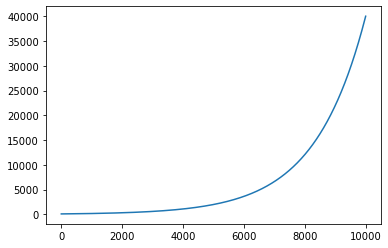

In [53]:
plt.plot(e**2)

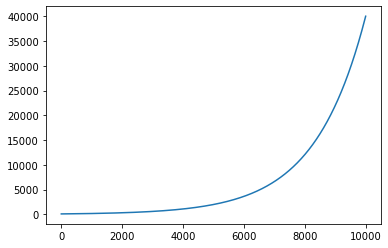

In [54]:
plt.plot(s)

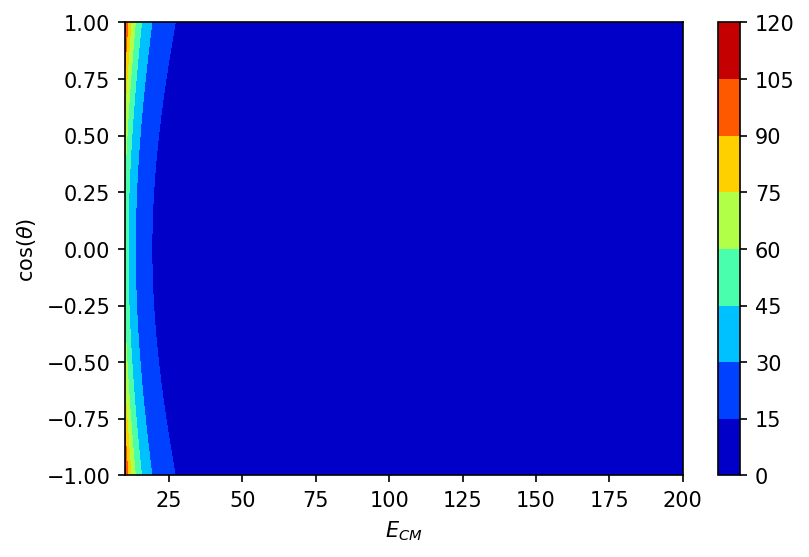

In [6]:
# plotting (2D contour)
fig, ax = plt.subplots(dpi=150)

cp = ax.contourf(E, C, CS, cmap='jet')
fig.colorbar(cp)  # add colorbar
#ax.set_title('Contour Plot')
#ax.set_xlabel('$\hat{s}$')
ax.set_xlabel('$E_{CM}$')
ax.set_ylabel('cos$(\\theta)$')

#plt.savefig('2d_contour_plot_E_QED.png')
plt.show()

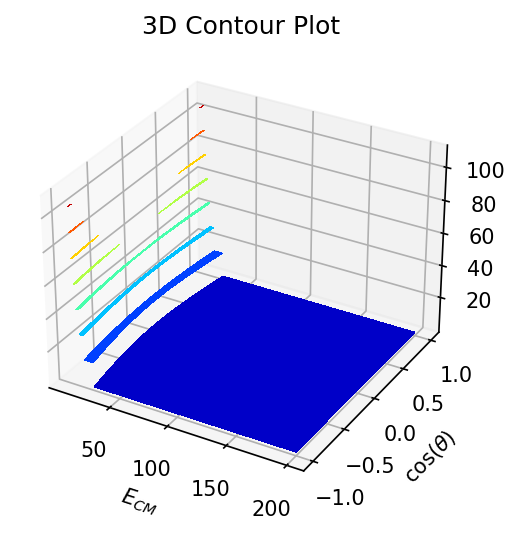

In [7]:
# plotting (3D contour)
ax = plt.figure(dpi=150).add_subplot(projection='3d')

cont = ax.contourf(E, C, CS, cmap='jet')
ax.set_title('3D Contour Plot')
#ax.set_xlabel('$\hat{s}$')
ax.set_xlabel('$E_{CM}$')
ax.set_ylabel('cos$(\\theta)$')

plt.show()

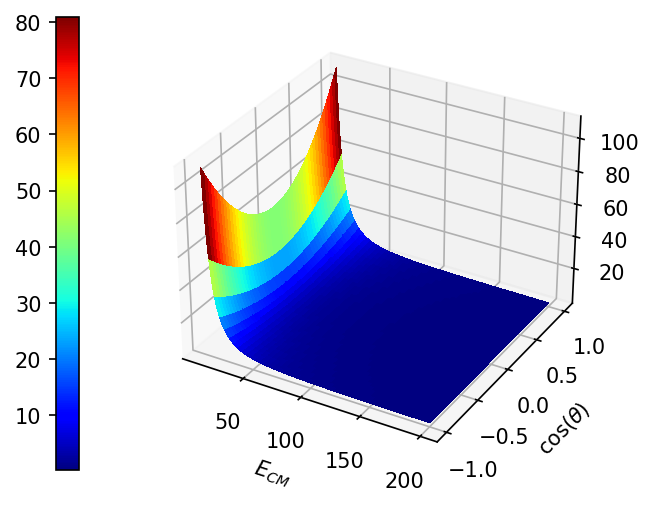

In [9]:
# plotting (3D surface)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},dpi=150)

# Plot the surface.
surf = ax.plot_surface(E, C, CS, cmap='jet', linewidth=0, antialiased=False)
#ax.set_title('3D Surface Plot')
#ax.set_xlabel('$\hat{s}$')
ax.set_xlabel('$E_{CM}$')
ax.set_ylabel('cos$(\\theta)$')
fig.colorbar(surf, location='left')

#plt.savefig('3d_surface_plot_E_QED.png')
plt.show()